In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf
import statsmodels

In [3]:
df_data= pd.read_csv('https://raw.githubusercontent.com/yanqizeng/QM/main/lsoa_data_marked.csv') #读数据

In [4]:
df_data.head()

,lower_super_output_area,names,population_density,household_composition_couple_household_with_dependent_children,household_composition_couple_household_without_dependent_children,household_composition_lone_parent_household,household_composition_one_person_household,household_composition_other_multi_person_household,tenure_owned_outright,tenure_owned_with_a_mortgage_or_loan,...,qualifications_highest_level_of_qualification_level_2_qualifications,qualifications_highest_level_of_qualification_apprenticeship,qualifications_highest_level_of_qualification_level_3_qualifications,qualifications_highest_level_of_qualification_level_4_qualifications_and_above,qualifications_highest_level_of_qualification_other_qualifications,qualifications_schoolchildren_and_full_time_students_age_18_and_over,health_very_good_or_good_health,health_fair_health,health_bad_or_very_bad_health,road_casualties_2011_total
0,E01000907,Camden 001A,10.7,12.3,20.1,21.1,33.0,13.6,12.6,18.0,...,9.1,1.0,9.1,44.2,7.5,6.4,78.0,13.2,8.7,1
1,E01000908,Camden 001B,17.5,11.6,17.3,13.2,50.8,7.1,14.0,17.7,...,10.1,0.8,8.8,50.4,7.3,4.8,78.2,12.4,9.4,0
2,E01000909,Camden 001C,22.9,17.9,29.3,7.3,30.1,15.4,38.3,21.2,...,8.3,0.7,9.6,61.9,4.7,4.5,85.6,10.0,4.5,1
3,E01000912,Camden 001D,89.6,12.9,16.6,15.7,38.6,16.3,15.3,14.6,...,9.4,1.1,8.7,47.2,6.2,8.8,77.2,14.6,8.2,12
4,E01000913,Camden 001E,161.7,19.3,34.6,3.7,29.1,13.3,47.1,27.6,...,9.6,0.4,9.4,65.2,5.5,4.0,89.6,7.3,3.1,2


In [5]:
df_data.shape

(4835, 31)

In [6]:
df_data.columns

Index(['lower_super_output_area', 'names', 'population_density',
       'household_composition_couple_household_with_dependent_children',
       'household_composition_couple_household_without_dependent_children',
       'household_composition_lone_parent_household',
       'household_composition_one_person_household',
       'household_composition_other_multi_person_household',
       'tenure_owned_outright', 'tenure_owned_with_a_mortgage_or_loan',
       'tenure_social_rented', 'tenure_private_rented',
       'dwelling_type_household_spaces_with_at_least_one_usual_resident',
       'dwelling_type_household_spaces_with_no_usual_residents',
       'dwelling_type_whole_house_or_bungalow_detached',
       'dwelling_type_whole_house_or_bungalow_semi_detached',
       'dwelling_type_whole_house_or_bungalow_terraced',
       'dwelling_type_flat_maisonette_or_apartment', 'house_prices_sales',
       'economic_activity_employment_rate',
       'qualifications_highest_level_of_qualification_le

In [7]:
# 2 = y Dependent variable
# 3 = x Independent variable

df_test=df_data.iloc[:,[2,3]]

In [8]:
# calculating correlation

df_test.corr()   

,population_density,household_composition_couple_household_with_dependent_children
population_density,1.000000,0.130718
household_composition_couple_household_with_dependent_children,0.130718,1.000000


In [9]:
# OSL Regression
# ~ preceding name is Y
# ~ followed by the name X

reg_uner_wa = smf.ols(formula='population_density ~household_composition_couple_household_with_dependent_children',data=df_test).fit()   

print(reg_uner_wa.summary()) 

                            OLS Regression Results                            
Dep. Variable:     population_density   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     84.02
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           7.10e-20
Time:                        19:45:41   Log-Likelihood:                -26840.
No. Observations:                4835   AIC:                         5.368e+04
Df Residuals:                    4833   BIC:                         5.370e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [10]:
# Regression equation

beta_0, beta_1 = reg_uner_wa.params
rsq    = reg_uner_wa.rsquared
pval_0, pval_1 = reg_uner_wa.pvalues

print("y =", round(beta_1,3), "x +", round(beta_0,3)) #y = beta1 x + beta0
print("R^2 = ", rsq)
print("household_composition_couple_household_with_dependent_children = ", round(pval_1,5))

y = 1.333 x + 7.94
R^2 =  0.017087092016994987
household_composition_couple_household_with_dependent_children =  0.0


y = 1.333 x + 7.94
Rsq =  0.017087092016994987
p-value of religionc_religion_not_stated =  7.09649345824546e-20


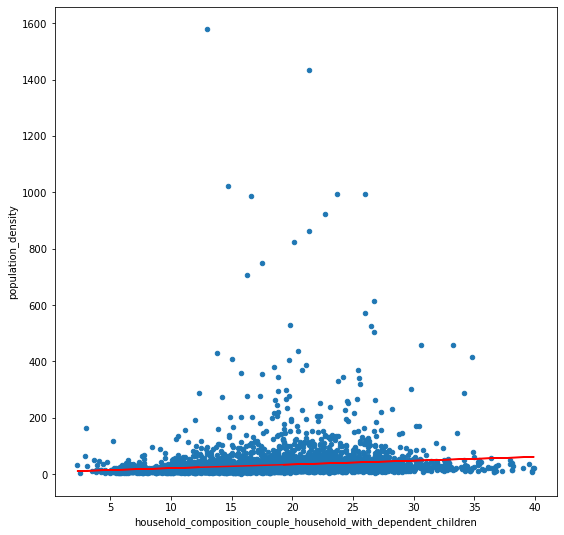

In [12]:
fig, ax = plt.subplots()
df_test.plot(kind='scatter', x='household_composition_couple_household_with_dependent_children', y='population_density', figsize=(9, 9), ax = ax)

X=df_test.household_composition_couple_household_with_dependent_children
b = plt.plot(X, X*beta_1 + beta_0, 'r') # Plot the regression line.

print("y =", round(beta_1,3), "x +", round(beta_0,3))
print("Rsq = ", rsq)
print("p-value of religionc_religion_not_stated = ", pval_1)